In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

# Import Statsmodels
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.base.datetools import dates_from_str

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [4]:
pd.options.display.float_format = '{:.1f}'.format

In [11]:
card_spending = pd.read_csv("CARD_SPENDING.csv", encoding='cp949')
korean = pd.read_csv("KOREAN.csv", encoding='cp949')
long_term_frgn = pd.read_csv("LONG_TERM_FRGN.csv", encoding='cp949')
short_term_frgn = pd.read_csv("SHORT_TERM_FRGN.csv", encoding='cp949')
food_waste = pd.read_csv("FOOD_WASTE.csv", encoding='cp949')

C:\Users\Jeong NeulPum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
food_waste = food_waste.loc[:,['base_date', 'emd_nm', 'em_g']]

In [13]:
food_waste

,base_date,emd_nm,em_g
0,2018-01-01,외도동,15500
1,2018-01-01,아라동,59800
2,2018-01-01,아라동,25350
3,2018-01-01,아라동,30000
4,2018-01-01,아라동,44050
...,...,...,...
2211440,2021-06-30,한림읍,58250
2211441,2021-06-30,한림읍,111000
2211442,2021-06-30,한림읍,48300
2211443,2021-06-30,한림읍,22050


In [43]:
food_waste = food_waste.groupby(['base_date', 'emd_nm'])['em_g'].sum().reset_index()

In [44]:
food_waste # food_waste 준비완료

,base_date,emd_nm,em_g
0,2018-01-01,건입동,1708250
1,2018-01-01,남원읍,1239600
2,2018-01-01,노형동,9357900
3,2018-01-01,대륜동,1717700
4,2018-01-01,대정읍,1264950
...,...,...,...
50517,2021-06-30,표선면,1377450
50518,2021-06-30,한경면,973850
50519,2021-06-30,한림읍,3298100
50520,2021-06-30,화북동,3749600


In [91]:
food_waste['base_date'] = pd.to_datetime(food_waste['base_date'])

In [14]:
korean

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.6,15.5,151.5,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0,3.7,171.3,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.5,17.0,166.1,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0,4.3,195.9,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.8,5.9,148.7,제주
...,...,...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,서귀포시,50130620,예래동,남성,20,0.0,0.0,599.2,그외
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,187.6,42.0,75.6,제주
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,121.8,0.0,4.5,제주
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122.2,0.0,4.5,제주


In [88]:
korean = korean.loc[:,['base_date', 'time', 'emd_nm', 'sex', 'age', 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']]

In [89]:
korean

,base_date,time,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,1,한림읍,여성,0,638.6,15.5,151.5
1,2018-01-01,1,한림읍,여성,0,0.0,3.7,171.3
2,2018-01-01,1,한림읍,여성,10,668.5,17.0,166.1
3,2018-01-01,1,한림읍,여성,10,0.0,4.3,195.9
4,2018-01-01,1,한림읍,여성,20,609.8,5.9,148.7
...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,예래동,남성,20,0.0,0.0,599.2
47250192,2021-06-30,24,예래동,남성,20,187.6,42.0,75.6
47250193,2021-06-30,24,예래동,남성,10,121.8,0.0,4.5
47250194,2021-06-30,24,예래동,남성,80,122.2,0.0,4.5


In [90]:
korean['base_date'] = pd.to_datetime(korean['base_date'])

In [95]:
korean1 = korean.groupby(['base_date', 'emd_nm'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

<ipython-input-95-20bd8303eb37>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  korean1 = korean.groupby(['base_date', 'emd_nm'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()


In [97]:
korean = korean1 # korean 준비완료

In [99]:
korean.columns = ['base_date', 'emd_nm', 'korean_resd_pop_cnt', 'korean_work_pop_cnt', 'korean_visit_pop_cnt']

In [ ]:
######################################################

In [76]:
cardspending = card_spending

In [77]:
cardspending['base_date'] = pd.to_datetime(cardspending['base_date'])

In [78]:
cardspending = cardspending.loc[:,['base_date', 'emd_nm', 'mct_cat_nm', 'use_cnt']]

In [79]:
cardspending

,base_date,emd_nm,mct_cat_nm,use_cnt
0,2018-01-06,연동,한식,3643
1,2018-01-09,연동,패스트푸드,432
2,2018-01-15,연동,농축수산물,236
3,2018-01-15,연동,마트/슈퍼마켓,4031
4,2018-01-20,연동,식품,633
...,...,...,...,...
544800,2020-10-16,알수없음,배달,5
544801,2019-08-31,알수없음,배달,5
544802,2020-10-03,알수없음,배달,10
544803,2020-10-23,알수없음,배달,5


In [80]:
cardspending1 = cardspending.groupby(['base_date', 'emd_nm', 'mct_cat_nm'])['use_cnt'].sum().reset_index()

In [82]:
cardspending1 = pd.get_dummies(cardspending1, columns = ['mct_cat_nm'])

In [83]:
cardspending1['간식_cnt'] = cardspending1['mct_cat_nm_간식'] * cardspending1['use_cnt']
cardspending1['농축수산물_cnt'] = cardspending1['mct_cat_nm_농축수산물'] * cardspending1['use_cnt']
cardspending1['마트/슈퍼마켓_cnt'] = cardspending1['mct_cat_nm_마트/슈퍼마켓'] * cardspending1['use_cnt']
cardspending1['배달_cnt'] = cardspending1['mct_cat_nm_배달'] * cardspending1['use_cnt']
cardspending1['식품_cnt'] = cardspending1['mct_cat_nm_식품'] * cardspending1['use_cnt']
cardspending1['아시아음식_cnt'] = cardspending1['mct_cat_nm_아시아음식'] * cardspending1['use_cnt']
cardspending1['양식_cnt'] = cardspending1['mct_cat_nm_양식'] * cardspending1['use_cnt']
cardspending1['주점및주류판매_cnt'] = cardspending1['mct_cat_nm_주점및주류판매'] * cardspending1['use_cnt']
cardspending1['패스트푸드_cnt'] = cardspending1['mct_cat_nm_패스트푸드'] * cardspending1['use_cnt']
cardspending1['한식_cnt'] = cardspending1['mct_cat_nm_한식'] * cardspending1['use_cnt']
cardspending1['부페_cnt'] = cardspending1['mct_cat_nm_부페'] * cardspending1['use_cnt']

In [84]:
cardspending1 

,base_date,emd_nm,use_cnt,mct_cat_nm_간식,mct_cat_nm_농축수산물,mct_cat_nm_마트/슈퍼마켓,mct_cat_nm_배달,mct_cat_nm_부페,mct_cat_nm_식품,mct_cat_nm_아시아음식,mct_cat_nm_양식,mct_cat_nm_주점및주류판매,mct_cat_nm_패스트푸드,mct_cat_nm_한식,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2018-01-01,건입동,79,1,0,0,0,0,0,0,0,0,0,0,79,0,0,0,0,0,0,0,0,0,0
1,2018-01-01,건입동,34,0,1,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0
2,2018-01-01,건입동,589,0,0,1,0,0,0,0,0,0,0,0,0,0,589,0,0,0,0,0,0,0,0
3,2018-01-01,건입동,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0
4,2018-01-01,건입동,152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,152,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539726,2021-06-30,효돈동,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,151,0,0,0,0,0,0
539727,2021-06-30,효돈동,25,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0
539728,2021-06-30,효돈동,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0
539729,2021-06-30,효돈동,30,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,0,0


In [85]:
cardspending2 = cardspending1.groupby(['base_date' ,'emd_nm'])['간식_cnt', '농축수산물_cnt' , '마트/슈퍼마켓_cnt', '배달_cnt', '식품_cnt', '아시아음식_cnt', '양식_cnt', '주점및주류판매_cnt', '패스트푸드_cnt', '한식_cnt', '부페_cnt'].sum().reset_index()

<ipython-input-85-b87936a72178>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cardspending2 = cardspending1.groupby(['base_date' ,'emd_nm'])['간식_cnt', '농축수산물_cnt' , '마트/슈퍼마켓_cnt', '배달_cnt', '식품_cnt', '아시아음식_cnt', '양식_cnt', '주점및주류판매_cnt', '패스트푸드_cnt', '한식_cnt', '부페_cnt'].sum().reset_index()


In [87]:
cardspending = cardspending2 # cardspending 준비완료

In [ ]:
###########################################

In [16]:
long_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3,0.0,4.6,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1,0.0,5.7,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0,7.9,51.3,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0,0.0,8.2,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9,0.0,2.9,제주
...,...,...,...,...,...,...,...,...,...,...
23837312,2021-06-30,24,THA,서귀포시,50130620,예래동,0.0,0.0,3.4,제주
23837313,2021-06-30,24,TWN,서귀포시,50130620,예래동,0.0,0.0,12.3,그외
23837314,2021-06-30,24,USA,서귀포시,50130620,예래동,22.1,0.0,0.0,제주
23837315,2021-06-30,24,USA,서귀포시,50130620,예래동,0.0,0.0,26.5,그외


In [46]:
long_term_frgn = long_term_frgn.loc[:,['base_date', 'time', 'nationality', 'emd_nm', 'resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt']]

In [47]:
change_nationality={'AUS' : '오세아니아', 'BGD': '아시아', 'CAN' : '북아메리카', 'CHN' : '아시아', 'DEU' : '유럽', 'EGY' : '아프리카', 'ETC' : '기타', 'FRA' : '유럽','GBR' : '유럽','IDN' : '아시아','IND' : '아시아' , 'JPN' : '아시아' ,'KAZ' : '아시아' 
,'KGZ' : '아시아' 
,'KHM' : '아시아' 
,'LKA' : '아시아' 
,'MGL' : '아시아' 
,'MMR' : '아시아' 
,'MYS' : '아시아' 
,'NGR' : '아프리카'
,'NPL' : '아시아' 
,'NZL' : '오세아니아'
,'PAK' : '아시아'
,'PHL' : '아시아'
,'RUS' : '유럽'
,'THA' : '아시아' 
 ,'TWN' : '아시아'
 ,'UKR' : '유럽' 
 ,'USA' : '북아메리카'
 ,'UZB' : '아시아'
 ,'VNM' : '아시아'
 ,'HKG' : '아시아'
 ,'SGP' : '아시아'}

In [48]:
long_term_frgn=long_term_frgn.replace({'nationality' : change_nationality})

In [49]:
long_term_frgn['nationality'].value_counts()

아시아      16942832
북아메리카     2822954
유럽        1656038
기타        1618809
오세아니아      764952
아프리카        31732
Name: nationality, dtype: int64

In [50]:
long_term_frgn

,base_date,time,nationality,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,1,북아메리카,한림읍,6.3,0.0,4.6
1,2018-01-01,1,아시아,한림읍,442.1,0.0,5.7
2,2018-01-01,1,아시아,한림읍,0.0,7.9,51.3
3,2018-01-01,1,유럽,한림읍,0.0,0.0,8.2
4,2018-01-01,1,기타,한림읍,15.9,0.0,2.9
...,...,...,...,...,...,...,...
23837312,2021-06-30,24,아시아,예래동,0.0,0.0,3.4
23837313,2021-06-30,24,아시아,예래동,0.0,0.0,12.3
23837314,2021-06-30,24,북아메리카,예래동,22.1,0.0,0.0
23837315,2021-06-30,24,북아메리카,예래동,0.0,0.0,26.5


In [51]:
long_term_frgn1 = long_term_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()

<ipython-input-51-536155300ee7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  long_term_frgn1 = long_term_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['resd_pop_cnt', 'work_pop_cnt', 'visit_pop_cnt'].sum().reset_index()


In [58]:
long_term_frgn1

,base_date,emd_nm,nationality,resd_pop_cnt,work_pop_cnt,visit_pop_cnt
0,2018-01-01,건입동,기타,4.0,0.0,66.0
1,2018-01-01,건입동,북아메리카,0.0,0.0,199.5
2,2018-01-01,건입동,아시아,4471.0,797.8,4389.1
3,2018-01-01,건입동,유럽,0.0,0.0,123.3
4,2018-01-01,구좌읍,기타,0.0,0.0,89.0
...,...,...,...,...,...,...
257083,2021-06-30,화북동,유럽,26.7,6.2,10.1
257084,2021-06-30,효돈동,기타,0.0,0.0,57.3
257085,2021-06-30,효돈동,북아메리카,0.0,0.0,82.3
257086,2021-06-30,효돈동,아시아,1072.6,95.3,653.2


In [59]:
long_term_frgn1['work_pop_cnt'].value_counts() # work_pop_cnt는 삭제 => 0값이 너무 많고 어차피 다른 변수들이랑 상관계수 매우 높음

0.0      147229
87.9        176
3.7          94
29.3         85
25.6         84
          ...  
783.2         1
54.4          1
512.0         1
241.9         1
56.7          1
Name: work_pop_cnt, Length: 97247, dtype: int64

In [60]:
long_term_frgn1 = long_term_frgn1.loc[:,['base_date', 'emd_nm', 'nationality', 'resd_pop_cnt', 'visit_pop_cnt']]

In [61]:
long_term_frgn2 = pd.get_dummies(long_term_frgn1, columns=['nationality'])

In [62]:
long_term_frgn2

,base_date,emd_nm,resd_pop_cnt,visit_pop_cnt,nationality_기타,nationality_북아메리카,nationality_아시아,nationality_아프리카,nationality_오세아니아,nationality_유럽
0,2018-01-01,건입동,4.0,66.0,1,0,0,0,0,0
1,2018-01-01,건입동,0.0,199.5,0,1,0,0,0,0
2,2018-01-01,건입동,4471.0,4389.1,0,0,1,0,0,0
3,2018-01-01,건입동,0.0,123.3,0,0,0,0,0,1
4,2018-01-01,구좌읍,0.0,89.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
257083,2021-06-30,화북동,26.7,10.1,0,0,0,0,0,1
257084,2021-06-30,효돈동,0.0,57.3,1,0,0,0,0,0
257085,2021-06-30,효돈동,0.0,82.3,0,1,0,0,0,0
257086,2021-06-30,효돈동,1072.6,653.2,0,0,1,0,0,0


In [63]:
long_term_frgn2['기타_visit_pop_cnt'] = long_term_frgn2['nationality_기타']*long_term_frgn2['visit_pop_cnt']
long_term_frgn2['북아메리카_visit_pop_cnt'] = long_term_frgn2['nationality_북아메리카']*long_term_frgn2['visit_pop_cnt']
long_term_frgn2['아시아_visit_pop_cnt'] = long_term_frgn2['nationality_아시아']*long_term_frgn2['visit_pop_cnt']
long_term_frgn2['아프리카_visit_pop_cnt'] = long_term_frgn2['nationality_아프리카']*long_term_frgn2['visit_pop_cnt']
long_term_frgn2['오세아니아_visit_pop_cnt'] = long_term_frgn2['nationality_오세아니아']*long_term_frgn2['visit_pop_cnt']
long_term_frgn2['유럽_visit_pop_cnt'] = long_term_frgn2['nationality_유럽']*long_term_frgn2['visit_pop_cnt']

long_term_frgn2['기타_resd_pop_cnt'] = long_term_frgn2['nationality_기타']*long_term_frgn2['resd_pop_cnt']
long_term_frgn2['북아메리카_resd_pop_cnt'] = long_term_frgn2['nationality_북아메리카']*long_term_frgn2['resd_pop_cnt']
long_term_frgn2['아시아_resd_pop_cnt'] = long_term_frgn2['nationality_아시아']*long_term_frgn2['resd_pop_cnt']
long_term_frgn2['아프리카_resd_pop_cnt'] = long_term_frgn2['nationality_아프리카']*long_term_frgn2['resd_pop_cnt']
long_term_frgn2['오세아니아_resd_pop_cnt'] = long_term_frgn2['nationality_오세아니아']*long_term_frgn2['resd_pop_cnt']
long_term_frgn2['유럽_resd_pop_cnt'] = long_term_frgn2['nationality_유럽']*long_term_frgn2['resd_pop_cnt']

In [64]:
long_term_frgn2

,base_date,emd_nm,resd_pop_cnt,visit_pop_cnt,nationality_기타,nationality_북아메리카,nationality_아시아,nationality_아프리카,nationality_오세아니아,nationality_유럽,기타_visit_pop_cnt,북아메리카_visit_pop_cnt,아시아_visit_pop_cnt,아프리카_visit_pop_cnt,오세아니아_visit_pop_cnt,유럽_visit_pop_cnt,기타_resd_pop_cnt,북아메리카_resd_pop_cnt,아시아_resd_pop_cnt,아프리카_resd_pop_cnt,오세아니아_resd_pop_cnt,유럽_resd_pop_cnt
0,2018-01-01,건입동,4.0,66.0,1,0,0,0,0,0,66.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
1,2018-01-01,건입동,0.0,199.5,0,1,0,0,0,0,0.0,199.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-01-01,건입동,4471.0,4389.1,0,0,1,0,0,0,0.0,0.0,4389.1,0.0,0.0,0.0,0.0,0.0,4471.0,0.0,0.0,0.0
3,2018-01-01,건입동,0.0,123.3,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,123.3,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-01-01,구좌읍,0.0,89.0,1,0,0,0,0,0,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257083,2021-06-30,화북동,26.7,10.1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,10.1,0.0,0.0,0.0,0.0,0.0,26.7
257084,2021-06-30,효돈동,0.0,57.3,1,0,0,0,0,0,57.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257085,2021-06-30,효돈동,0.0,82.3,0,1,0,0,0,0,0.0,82.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257086,2021-06-30,효돈동,1072.6,653.2,0,0,1,0,0,0,0.0,0.0,653.2,0.0,0.0,0.0,0.0,0.0,1072.6,0.0,0.0,0.0


In [65]:
long_term_frgn2 = long_term_frgn2.groupby(['base_date' ,'emd_nm'])['기타_visit_pop_cnt', '북아메리카_visit_pop_cnt', '아시아_visit_pop_cnt', '아프리카_visit_pop_cnt','오세아니아_visit_pop_cnt','유럽_visit_pop_cnt',
                                                                  '기타_resd_pop_cnt', '북아메리카_resd_pop_cnt', '아시아_resd_pop_cnt', '아프리카_resd_pop_cnt','오세아니아_resd_pop_cnt','유럽_resd_pop_cnt'].sum().reset_index()

<ipython-input-65-1fe3180a5547>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  long_term_frgn2 = long_term_frgn2.groupby(['base_date' ,'emd_nm'])['기타_visit_pop_cnt', '북아메리카_visit_pop_cnt', '아시아_visit_pop_cnt', '아프리카_visit_pop_cnt','오세아니아_visit_pop_cnt','유럽_visit_pop_cnt',


In [68]:
long_term_frgn = long_term_frgn2 # long_term_frgn 준비완료

In [103]:
long_term_frgn.columns = ['base_date', 'emd_nm', 'longtermfrgn_기타_visit_pop_cnt', 'longtermfrgn_북아메리카_visit_pop_cnt', 'longtermfrgn_아시아_visit_pop_cnt',
                         'longtermfrgn_아프리카_visit_pop_cnt', 'longtermfrgn_오세아니아_visit_pop_cnt', 'longtermfrgn_유럽_visit_pop_cnt',
                         'longtermfrgn_기타_resd_pop_cnt', 'longtermfrgn_북아메리카_resd_pop_cnt', 'longtermfrgn_아시아_resd_pop_cnt',
                         'longtermfrgn_아프리카_resd_pop_cnt', 'longtermfrgn_오세아니아_resd_pop_cnt', 'longtermfrgn_유럽_resd_pop_cnt']

In [92]:
long_term_frgn['base_date'] = pd.to_datetime(long_term_frgn['base_date'])

In [ ]:
####################################################

In [17]:
short_term_frgn

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.7
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.6
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2


In [18]:
short_term_frgn = short_term_frgn.loc[:,['base_date', 'time', 'nationality', 'emd_nm', 'visit_pop_cnt']]

In [20]:
change_nationality={'AUS' : '오세아니아', 'BGD': '아시아', 'CAN' : '북아메리카', 'CHN' : '아시아', 'DEU' : '유럽', 'EGY' : '아프리카', 'ETC' : '기타', 'FRA' : '유럽','GBR' : '유럽','IDN' : '아시아','IND' : '아시아' , 'JPN' : '아시아' ,'KAZ' : '아시아' 
,'KGZ' : '아시아' 
,'KHM' : '아시아' 
,'LKA' : '아시아' 
,'MGL' : '아시아' 
,'MMR' : '아시아' 
,'MYS' : '아시아' 
,'NGR' : '아프리카'
,'NPL' : '아시아' 
,'NZL' : '오세아니아'
,'PAK' : '아시아'
,'PHL' : '아시아'
,'RUS' : '유럽'
,'THA' : '아시아' 
 ,'TWN' : '아시아'
 ,'UKR' : '유럽' 
 ,'USA' : '북아메리카'
 ,'UZB' : '아시아'
 ,'VNM' : '아시아'
 ,'HKG' : '아시아'
 ,'SGP' : '아시아'}

In [21]:
short_term_frgn=short_term_frgn.replace({'nationality' : change_nationality})

In [38]:
short_term_frgn['nationality'].value_counts()

아시아      4383026
기타       1024266
북아메리카     651752
Name: nationality, dtype: int64

In [34]:
short_term_frgn1 = short_term_frgn.groupby(['base_date', 'emd_nm', 'nationality'])['visit_pop_cnt'].sum().reset_index()

In [35]:
short_term_frgn1

,base_date,emd_nm,nationality,visit_pop_cnt
0,2018-01-01,건입동,기타,258.9
1,2018-01-01,건입동,북아메리카,2.0
2,2018-01-01,건입동,아시아,4516.4
3,2018-01-01,구좌읍,기타,63.4
4,2018-01-01,구좌읍,북아메리카,46.9
...,...,...,...,...
141230,2021-06-30,한림읍,북아메리카,21.2
141231,2021-06-30,한림읍,아시아,24.5
141232,2021-06-30,화북동,북아메리카,42.4
141233,2021-06-30,화북동,아시아,1.4


In [36]:
short_term_frgn2 = pd.get_dummies(short_term_frgn1, columns=['nationality'])

In [37]:
short_term_frgn2

,base_date,emd_nm,visit_pop_cnt,nationality_기타,nationality_북아메리카,nationality_아시아
0,2018-01-01,건입동,258.9,1,0,0
1,2018-01-01,건입동,2.0,0,1,0
2,2018-01-01,건입동,4516.4,0,0,1
3,2018-01-01,구좌읍,63.4,1,0,0
4,2018-01-01,구좌읍,46.9,0,1,0
...,...,...,...,...,...,...
141230,2021-06-30,한림읍,21.2,0,1,0
141231,2021-06-30,한림읍,24.5,0,0,1
141232,2021-06-30,화북동,42.4,0,1,0
141233,2021-06-30,화북동,1.4,0,0,1


In [39]:
short_term_frgn2['기타_visit_pop_cnt'] = short_term_frgn2['nationality_기타']*short_term_frgn2['visit_pop_cnt']
short_term_frgn2['북아메리카_visit_pop_cnt'] = short_term_frgn2['nationality_북아메리카']*short_term_frgn2['visit_pop_cnt']
short_term_frgn2['아시아_visit_pop_cnt'] = short_term_frgn2['nationality_아시아']*short_term_frgn2['visit_pop_cnt']

In [40]:
short_term_frgn2

,base_date,emd_nm,visit_pop_cnt,nationality_기타,nationality_북아메리카,nationality_아시아,기타_visit_pop_cnt,북아메리카_visit_pop_cnt,아시아_visit_pop_cnt
0,2018-01-01,건입동,258.9,1,0,0,258.9,0.0,0.0
1,2018-01-01,건입동,2.0,0,1,0,0.0,2.0,0.0
2,2018-01-01,건입동,4516.4,0,0,1,0.0,0.0,4516.4
3,2018-01-01,구좌읍,63.4,1,0,0,63.4,0.0,0.0
4,2018-01-01,구좌읍,46.9,0,1,0,0.0,46.9,0.0
...,...,...,...,...,...,...,...,...,...
141230,2021-06-30,한림읍,21.2,0,1,0,0.0,21.2,0.0
141231,2021-06-30,한림읍,24.5,0,0,1,0.0,0.0,24.5
141232,2021-06-30,화북동,42.4,0,1,0,0.0,42.4,0.0
141233,2021-06-30,화북동,1.4,0,0,1,0.0,0.0,1.4


In [41]:
short_term_frgn2 = short_term_frgn2.groupby(['base_date' ,'emd_nm'])['기타_visit_pop_cnt', '북아메리카_visit_pop_cnt', '아시아_visit_pop_cnt'].sum().reset_index()

<ipython-input-41-c0d8baddae91>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  short_term_frgn2 = short_term_frgn2.groupby(['base_date' ,'emd_nm'])['기타_visit_pop_cnt', '북아메리카_visit_pop_cnt', '아시아_visit_pop_cnt'].sum().reset_index()


In [45]:
short_term_frgn = short_term_frgn2 # short_term_frgn 준비완료

In [106]:
short_term_frgn.columns = ['base_date', 'emd_nm', 'shorttermfrgn_기타_visit_pop_cnt', 'shorttermfrgn_북아메리카_visit_pop_cnt', 'shorttermfrgn_아시아_visit_pop_cnt']

In [93]:
short_term_frgn['base_date'] = pd.to_datetime(short_term_frgn['base_date'])

In [ ]:
#########################################################

In [108]:
merge = pd.merge(long_term_frgn, short_term_frgn, how = 'inner')

In [110]:
merge = pd.merge(merge, cardspending, how = 'inner')

In [112]:
merge = pd.merge(korean, merge, how = 'inner')

In [114]:
merge = pd.merge(food_waste, merge, how = 'inner')

In [115]:
merge

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_북아메리카_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_아프리카_visit_pop_cnt,longtermfrgn_오세아니아_visit_pop_cnt,longtermfrgn_유럽_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_북아메리카_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,longtermfrgn_아프리카_resd_pop_cnt,longtermfrgn_오세아니아_resd_pop_cnt,longtermfrgn_유럽_resd_pop_cnt,shorttermfrgn_기타_visit_pop_cnt,shorttermfrgn_북아메리카_visit_pop_cnt,shorttermfrgn_아시아_visit_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2018-01-01,건입동,1708250,170069.3,18974.3,182005.7,66.0,199.5,4389.1,0.0,0.0,123.3,4.0,0.0,4471.0,0.0,0.0,0.0,258.9,2.0,4516.4,79,34,589,5,152,44,49,10,93,751,0
1,2018-01-01,남원읍,1239600,284458.2,17722.5,213841.0,34.4,51.2,2025.4,0.0,53.5,30.8,0.0,7.3,6943.4,0.0,0.0,0.0,626.0,86.0,2840.4,108,54,466,25,295,34,15,5,93,481,5
2,2018-01-01,노형동,9357900,1171497.7,71832.9,424610.4,117.7,322.5,10850.0,0.0,135.2,45.5,476.9,1927.8,40893.5,0.0,197.0,427.3,808.3,80.1,8765.7,1007,216,4905,123,943,363,236,54,987,3658,15
3,2018-01-01,대륜동,1717700,264716.0,19962.1,208720.9,74.6,459.3,2145.8,0.0,11.9,18.9,210.6,725.9,1720.2,0.0,205.6,93.5,221.9,5.9,1119.3,128,29,859,20,142,64,34,15,167,574,0
4,2018-01-01,대정읍,1264950,363105.9,15910.2,154216.8,155.1,618.5,3992.3,0.0,67.6,384.4,453.0,3600.0,16733.6,0.0,426.2,1100.6,171.7,0.0,1816.3,137,44,864,34,74,69,79,0,137,535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,표선면,1377450,239284.4,23521.0,158051.6,57.3,516.2,2546.3,0.0,0.0,194.7,137.6,123.5,3722.4,0.0,0.0,0.0,81.3,2.8,5.8,60,35,423,75,236,20,35,10,45,397,0
48417,2021-06-30,한경면,973850,167417.9,16029.6,98566.2,177.7,740.8,4370.9,0.0,88.1,165.5,197.8,467.7,5301.0,0.0,213.4,492.7,6.9,5.5,0.0,80,20,423,40,241,40,25,5,70,342,0
48418,2021-06-30,한림읍,3298100,470485.0,49193.1,286951.2,395.6,985.8,12591.4,0.0,427.6,378.1,283.8,1039.8,23002.8,0.0,23.2,185.4,27.3,21.2,24.5,136,80,669,257,599,106,80,0,166,946,5
48419,2021-06-30,화북동,3749600,572500.6,50152.6,241048.4,154.8,172.9,1885.7,0.0,4.6,10.1,258.0,355.8,5436.4,119.8,0.0,26.7,0.0,42.4,1.4,362,352,1645,644,513,146,50,15,282,1635,0


In [118]:
merge_corr = merge.drop(['base_date', 'emd_nm'], axis=1)

In [120]:
merge_corr.corr() # 상관계수 0.3 이상인 것들만 살리겠습니다.

,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_북아메리카_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_아프리카_visit_pop_cnt,longtermfrgn_오세아니아_visit_pop_cnt,longtermfrgn_유럽_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_북아메리카_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,longtermfrgn_아프리카_resd_pop_cnt,longtermfrgn_오세아니아_resd_pop_cnt,longtermfrgn_유럽_resd_pop_cnt,shorttermfrgn_기타_visit_pop_cnt,shorttermfrgn_북아메리카_visit_pop_cnt,shorttermfrgn_아시아_visit_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
em_g,1.0,0.9,0.7,0.7,0.3,0.2,0.3,-0.0,0.1,0.1,0.4,0.1,0.6,0.0,0.1,0.1,0.1,0.0,0.2,0.9,0.8,0.9,0.6,0.8,0.9,0.8,0.8,0.9,0.9,0.4
korean_resd_pop_cnt,0.9,1.0,0.8,0.9,0.4,0.3,0.6,0.0,0.2,0.2,0.5,0.2,0.8,0.1,0.3,0.3,0.2,0.1,0.2,0.9,0.8,0.9,0.7,0.9,0.9,0.8,0.8,0.9,0.9,0.4
korean_work_pop_cnt,0.7,0.8,1.0,0.8,0.3,0.2,0.5,0.0,0.2,0.2,0.5,0.2,0.7,0.0,0.3,0.2,0.3,0.2,0.3,0.8,0.7,0.8,0.5,0.7,0.8,0.7,0.7,0.7,0.8,0.4
korean_visit_pop_cnt,0.7,0.9,0.8,1.0,0.5,0.3,0.7,0.1,0.2,0.2,0.5,0.3,0.7,0.0,0.2,0.3,0.4,0.2,0.4,0.8,0.6,0.8,0.5,0.8,0.8,0.7,0.7,0.8,0.8,0.4
longtermfrgn_기타_visit_pop_cnt,0.3,0.4,0.3,0.5,1.0,0.7,0.6,0.1,0.6,0.7,0.6,0.4,0.5,0.1,0.5,0.5,0.1,0.1,0.2,0.3,0.2,0.3,0.3,0.4,0.3,0.4,0.3,0.3,0.3,0.1
longtermfrgn_북아메리카_visit_pop_cnt,0.2,0.3,0.2,0.3,0.7,1.0,0.4,0.1,0.8,0.9,0.6,0.6,0.4,0.1,0.7,0.7,0.2,0.2,0.2,0.2,0.1,0.2,0.1,0.3,0.2,0.4,0.1,0.2,0.2,0.0
longtermfrgn_아시아_visit_pop_cnt,0.3,0.6,0.5,0.7,0.6,0.4,1.0,0.1,0.3,0.3,0.4,0.3,0.7,-0.0,0.3,0.3,0.4,0.2,0.4,0.4,0.2,0.4,0.3,0.6,0.5,0.4,0.4,0.4,0.5,0.2
longtermfrgn_아프리카_visit_pop_cnt,-0.0,0.0,0.0,0.1,0.1,0.1,0.1,1.0,0.0,0.1,0.1,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
longtermfrgn_오세아니아_visit_pop_cnt,0.1,0.2,0.2,0.2,0.6,0.8,0.3,0.0,1.0,0.8,0.5,0.6,0.3,0.1,0.7,0.7,0.1,0.1,0.1,0.1,0.0,0.1,0.1,0.2,0.1,0.3,0.1,0.1,0.1,-0.0
longtermfrgn_유럽_visit_pop_cnt,0.1,0.2,0.2,0.2,0.7,0.9,0.3,0.1,0.8,1.0,0.5,0.5,0.3,0.1,0.6,0.6,0.1,0.1,0.1,0.2,0.0,0.1,0.1,0.2,0.1,0.3,0.1,0.1,0.1,0.0


In [121]:
merge_drop = merge.drop(['longtermfrgn_북아메리카_visit_pop_cnt', 'longtermfrgn_아프리카_visit_pop_cnt'
                        , 'longtermfrgn_오세아니아_visit_pop_cnt', 'longtermfrgn_유럽_visit_pop_cnt',
                        'longtermfrgn_북아메리카_resd_pop_cnt', 'longtermfrgn_아프리카_resd_pop_cnt',
                        'longtermfrgn_오세아니아_resd_pop_cnt', 'longtermfrgn_유럽_resd_pop_cnt',
                        'shorttermfrgn_기타_visit_pop_cnt', 'shorttermfrgn_북아메리카_visit_pop_cnt',
                        'shorttermfrgn_아시아_visit_pop_cnt'], axis=1)

In [122]:
merge_drop

,base_date,emd_nm,em_g,korean_resd_pop_cnt,korean_work_pop_cnt,korean_visit_pop_cnt,longtermfrgn_기타_visit_pop_cnt,longtermfrgn_아시아_visit_pop_cnt,longtermfrgn_기타_resd_pop_cnt,longtermfrgn_아시아_resd_pop_cnt,간식_cnt,농축수산물_cnt,마트/슈퍼마켓_cnt,배달_cnt,식품_cnt,아시아음식_cnt,양식_cnt,주점및주류판매_cnt,패스트푸드_cnt,한식_cnt,부페_cnt
0,2018-01-01,건입동,1708250,170069.3,18974.3,182005.7,66.0,4389.1,4.0,4471.0,79,34,589,5,152,44,49,10,93,751,0
1,2018-01-01,남원읍,1239600,284458.2,17722.5,213841.0,34.4,2025.4,0.0,6943.4,108,54,466,25,295,34,15,5,93,481,5
2,2018-01-01,노형동,9357900,1171497.7,71832.9,424610.4,117.7,10850.0,476.9,40893.5,1007,216,4905,123,943,363,236,54,987,3658,15
3,2018-01-01,대륜동,1717700,264716.0,19962.1,208720.9,74.6,2145.8,210.6,1720.2,128,29,859,20,142,64,34,15,167,574,0
4,2018-01-01,대정읍,1264950,363105.9,15910.2,154216.8,155.1,3992.3,453.0,16733.6,137,44,864,34,74,69,79,0,137,535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48416,2021-06-30,표선면,1377450,239284.4,23521.0,158051.6,57.3,2546.3,137.6,3722.4,60,35,423,75,236,20,35,10,45,397,0
48417,2021-06-30,한경면,973850,167417.9,16029.6,98566.2,177.7,4370.9,197.8,5301.0,80,20,423,40,241,40,25,5,70,342,0
48418,2021-06-30,한림읍,3298100,470485.0,49193.1,286951.2,395.6,12591.4,283.8,23002.8,136,80,669,257,599,106,80,0,166,946,5
48419,2021-06-30,화북동,3749600,572500.6,50152.6,241048.4,154.8,1885.7,258.0,5436.4,362,352,1645,644,513,146,50,15,282,1635,0


In [133]:
#merge_drop.to_csv("merge_drop.csv")

In [123]:
# merge_drop csv 파일이 있다면 여기서부터 돌리시면 됩니다!!!!!

train = merge_drop[merge_drop['base_date'] <= '2020-12-31']
test = merge_drop[merge_drop['base_date'] > '2020-12-31']

In [125]:
한림읍_train = train[train['emd_nm']=='한림읍']
애월읍_train = train[train['emd_nm']=='애월읍']
구좌읍_train = train[train['emd_nm']=='구좌읍']
조천읍_train = train[train['emd_nm']=='조천읍']
한경면_train = train[train['emd_nm']=='한경면']
일도1동_train = train[train['emd_nm']=='일도1동']
일도2동_train = train[train['emd_nm']=='일도2동']
이도1동_train = train[train['emd_nm']=='이도1동']
이도2동_train = train[train['emd_nm']=='이도2동']
삼도1동_train = train[train['emd_nm']=='삼도1동']
삼도2동_train = train[train['emd_nm']=='삼도2동']
용담1동_train = train[train['emd_nm']=='용담1동']
용담2동_train = train[train['emd_nm']=='용담2동']
건입동_train = train[train['emd_nm']=='건입동']
화북동_train = train[train['emd_nm']=='화북동']
삼양동_train = train[train['emd_nm']=='삼양동']
봉개동_train = train[train['emd_nm']=='봉개동']
아라동_train = train[train['emd_nm']=='아라동']
오라동_train = train[train['emd_nm']=='오라동']
연동_train = train[train['emd_nm']=='연동']
노형동_train = train[train['emd_nm']=='노형동']
외도동_train = train[train['emd_nm']=='외도동']
이호동_train = train[train['emd_nm']=='이호동']
도두동_train = train[train['emd_nm']=='도두동']
대정읍_train = train[train['emd_nm']=='대정읍']
남원읍_train = train[train['emd_nm']=='남원읍']
성산읍_train = train[train['emd_nm']=='성산읍']
안덕면_train = train[train['emd_nm']=='안덕면']
표선면_train = train[train['emd_nm']=='표선면']
송산동_train = train[train['emd_nm']=='송산동']
정방동_train = train[train['emd_nm']=='정방동']
중앙동_train = train[train['emd_nm']=='중앙동']
천지동_train = train[train['emd_nm']=='천지동']
효돈동_train = train[train['emd_nm']=='효돈동']
영천동_train = train[train['emd_nm']=='영천동']
동홍동_train = train[train['emd_nm']=='동홍동']
서홍동_train = train[train['emd_nm']=='서홍동']
대륜동_train = train[train['emd_nm']=='대륜동']
대천동_train = train[train['emd_nm']=='대천동']
중문동_train = train[train['emd_nm']=='중문동']
예래동_train = train[train['emd_nm']=='예래동']
알수없음_train = train[train['emd_nm']=='알수없음']

In [126]:
한림읍_test = test[test['emd_nm']=='한림읍']
애월읍_test = test[test['emd_nm']=='애월읍']
구좌읍_test = test[test['emd_nm']=='구좌읍']
조천읍_test = test[test['emd_nm']=='조천읍']
한경면_test = test[test['emd_nm']=='한경면']
일도1동_test = test[test['emd_nm']=='일도1동']
일도2동_test = test[test['emd_nm']=='일도2동']
이도1동_test = test[test['emd_nm']=='이도1동']
이도2동_test = test[test['emd_nm']=='이도2동']
삼도1동_test = test[test['emd_nm']=='삼도1동']
삼도2동_test = test[test['emd_nm']=='삼도2동']
용담1동_test = test[test['emd_nm']=='용담1동']
용담2동_test = test[test['emd_nm']=='용담2동']
건입동_test = test[test['emd_nm']=='건입동']
화북동_test = test[test['emd_nm']=='화북동']
삼양동_test = test[test['emd_nm']=='삼양동']
봉개동_test = test[test['emd_nm']=='봉개동']
아라동_test = test[test['emd_nm']=='아라동']
오라동_test = test[test['emd_nm']=='오라동']
연동_test = test[test['emd_nm']=='연동']
노형동_test = test[test['emd_nm']=='노형동']
외도동_test = test[test['emd_nm']=='외도동']
이호동_test = test[test['emd_nm']=='이호동']
도두동_test = test[test['emd_nm']=='도두동']
대정읍_test = test[test['emd_nm']=='대정읍']
남원읍_test = test[test['emd_nm']=='남원읍']
성산읍_test = test[test['emd_nm']=='성산읍']
안덕면_test = test[test['emd_nm']=='안덕면']
표선면_test = test[test['emd_nm']=='표선면']
송산동_test = test[test['emd_nm']=='송산동']
정방동_test = test[test['emd_nm']=='정방동']
중앙동_test = test[test['emd_nm']=='중앙동']
천지동_test = test[test['emd_nm']=='천지동']
효돈동_test = test[test['emd_nm']=='효돈동']
영천동_test = test[test['emd_nm']=='영천동']
동홍동_test = test[test['emd_nm']=='동홍동']
서홍동_test = test[test['emd_nm']=='서홍동']
대륜동_test = test[test['emd_nm']=='대륜동']
대천동_test = test[test['emd_nm']=='대천동']
중문동_test = test[test['emd_nm']=='중문동']
예래동_test = test[test['emd_nm']=='예래동']
알수없음_test = test[test['emd_nm']=='알수없음']

In [127]:
train_한림읍_inf = 한림읍_train.iloc[:, 2:].values
test_한림읍_inf = 한림읍_test.iloc[:, 2:].values

train_애월읍_inf = 애월읍_train.iloc[:, 2:].values
test_애월읍_inf = 애월읍_test.iloc[:, 2:].values

train_구좌읍_inf = 구좌읍_train.iloc[:, 2:].values
test_구좌읍_inf = 구좌읍_test.iloc[:, 2:].values

train_조천읍_inf = 조천읍_train.iloc[:, 2:].values
test_조천읍_inf = 조천읍_test.iloc[:, 2:].values

train_한경면_inf = 한경면_train.iloc[:, 2:].values
test_한경면_inf = 한경면_test.iloc[:, 2:].values

train_일도1동_inf = 일도1동_train.iloc[:, 2:].values
test_일도1동_inf = 일도1동_test.iloc[:, 2:].values

train_일도2동_inf = 일도2동_train.iloc[:, 2:].values
test_일도2동_inf = 일도2동_test.iloc[:, 2:].values

train_이도1동_inf = 이도1동_train.iloc[:, 2:].values
test_이도1동_inf = 이도1동_test.iloc[:, 2:].values

train_이도2동_inf = 이도2동_train.iloc[:, 2:].values
test_이도2동_inf = 이도2동_test.iloc[:, 2:].values

train_삼도1동_inf = 삼도1동_train.iloc[:, 2:].values
test_삼도1동_inf = 삼도1동_test.iloc[:, 2:].values

train_삼도2동_inf = 삼도2동_train.iloc[:, 2:].values
test_삼도2동_inf = 삼도2동_test.iloc[:, 2:].values

train_용담1동_inf = 용담1동_train.iloc[:, 2:].values
test_용담1동_inf = 용담1동_test.iloc[:, 2:].values

train_용담2동_inf = 용담2동_train.iloc[:, 2:].values
test_용담2동_inf = 용담2동_test.iloc[:, 2:].values

train_건입동_inf = 건입동_train.iloc[:, 2:].values
test_건입동_inf = 건입동_test.iloc[:, 2:].values

train_화북동_inf = 화북동_train.iloc[:, 2:].values
test_화북동_inf = 화북동_test.iloc[:, 2:].values

train_삼양동_inf = 삼양동_train.iloc[:, 2:].values
test_삼양동_inf = 삼양동_test.iloc[:, 2:].values

train_봉개동_inf = 봉개동_train.iloc[:, 2:].values
test_봉개동_inf = 봉개동_test.iloc[:, 2:].values

train_아라동_inf = 아라동_train.iloc[:, 2:].values
test_아라동_inf = 아라동_test.iloc[:, 2:].values

train_오라동_inf = 오라동_train.iloc[:, 2:].values
test_오라동_inf = 오라동_test.iloc[:, 2:].values

train_연동_inf = 연동_train.iloc[:, 2:].values
test_연동_inf = 연동_test.iloc[:, 2:].values

train_노형동_inf = 노형동_train.iloc[:, 2:].values
test_노형동_inf = 노형동_test.iloc[:, 2:].values

train_외도동_inf = 외도동_train.iloc[:, 2:].values
test_외도동_inf = 외도동_test.iloc[:, 2:].values

train_이호동_inf = 이호동_train.iloc[:, 2:].values
test_이호동_inf = 이호동_test.iloc[:, 2:].values

train_도두동_inf = 도두동_train.iloc[:, 2:].values
test_도두동_inf = 도두동_test.iloc[:, 2:].values

train_대정읍_inf = 대정읍_train.iloc[:, 2:].values
test_대정읍_inf = 대정읍_test.iloc[:, 2:].values

train_남원읍_inf = 남원읍_train.iloc[:, 2:].values
test_남원읍_inf = 남원읍_test.iloc[:, 2:].values

train_성산읍_inf = 성산읍_train.iloc[:, 2:].values
test_성산읍_inf = 성산읍_test.iloc[:, 2:].values

train_안덕면_inf = 안덕면_train.iloc[:, 2:].values
test_안덕면_inf = 안덕면_test.iloc[:, 2:].values

train_표선면_inf = 표선면_train.iloc[:, 2:].values
test_표선면_inf = 표선면_test.iloc[:, 2:].values

train_송산동_inf = 송산동_train.iloc[:, 2:].values
test_송산동_inf = 송산동_test.iloc[:, 2:].values

train_정방동_inf = 정방동_train.iloc[:, 2:].values
test_정방동_inf = 정방동_test.iloc[:, 2:].values

train_중앙동_inf = 중앙동_train.iloc[:, 2:].values
test_중앙동_inf = 중앙동_test.iloc[:, 2:].values

train_천지동_inf = 천지동_train.iloc[:, 2:].values
test_천지동_inf = 천지동_test.iloc[:, 2:].values

train_효돈동_inf = 효돈동_train.iloc[:, 2:].values
test_효돈동_inf = 효돈동_test.iloc[:, 2:].values

train_영천동_inf = 영천동_train.iloc[:, 2:].values
test_영천동_inf = 영천동_test.iloc[:, 2:].values

train_동홍동_inf = 동홍동_train.iloc[:, 2:].values
test_동홍동_inf = 동홍동_test.iloc[:, 2:].values

train_서홍동_inf = 서홍동_train.iloc[:, 2:].values
test_서홍동_inf = 서홍동_test.iloc[:, 2:].values

train_대륜동_inf = 대륜동_train.iloc[:, 2:].values
test_대륜동_inf = 대륜동_test.iloc[:, 2:].values

train_대천동_inf = 대천동_train.iloc[:, 2:].values
test_대천동_inf = 대천동_test.iloc[:, 2:].values

train_중문동_inf = 중문동_train.iloc[:, 2:].values
test_중문동_inf = 중문동_test.iloc[:, 2:].values

train_예래동_inf = 예래동_train.iloc[:, 2:].values
test_예래동_inf = 예래동_test.iloc[:, 2:].values

train_알수없음_inf = 알수없음_train.iloc[:, 2:].values
test_알수없음_inf = 알수없음_test.iloc[:, 2:].values

In [129]:
train_한림읍_inf.shape

(418, 19)

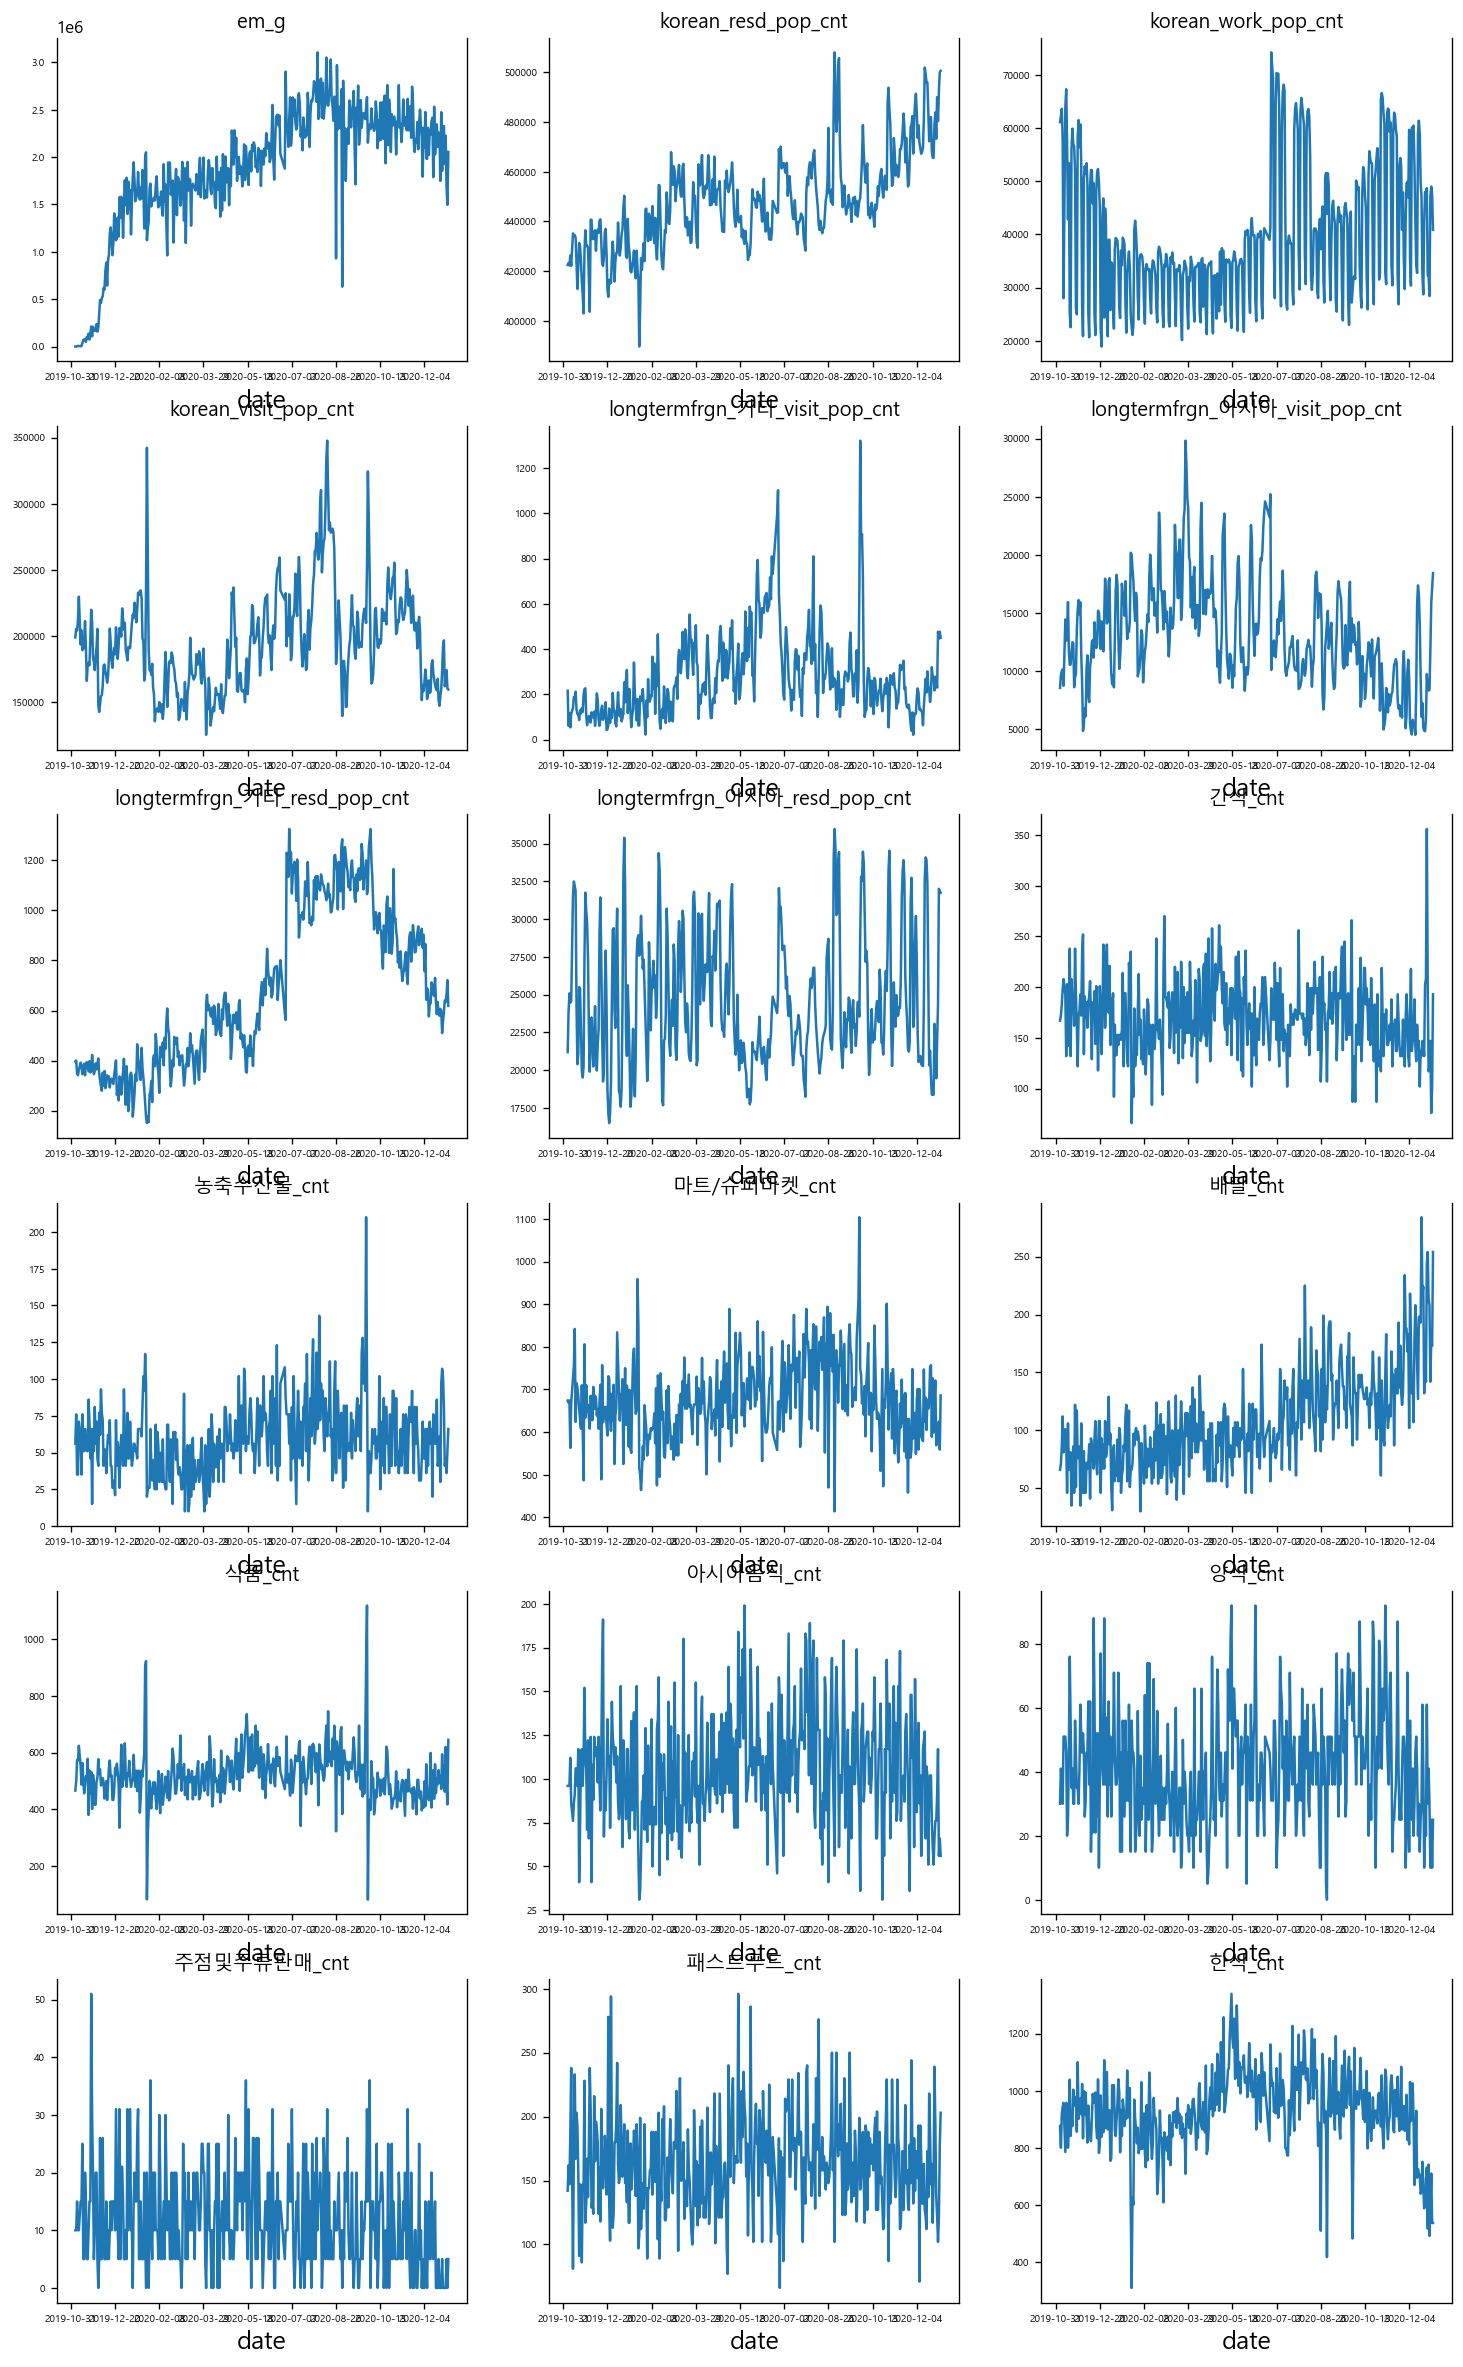

In [132]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=3, dpi=120, figsize=(15,25))
for i, ax in enumerate(axes.flatten()):
    x = 한림읍_train['base_date']
    data = 한림읍_train[한림읍_train.columns[i+2]]
    ax.plot(x, data)
    ax.set_title(한림읍_train.columns[i+2])
    ax.set_xlabel('date', fontsize = 15)
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()